In [1]:
#loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
#reading the file
df = pd.read_csv("insurance.csv")

In [3]:
# looking into the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA & Feature Engineering

In [6]:
# Summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


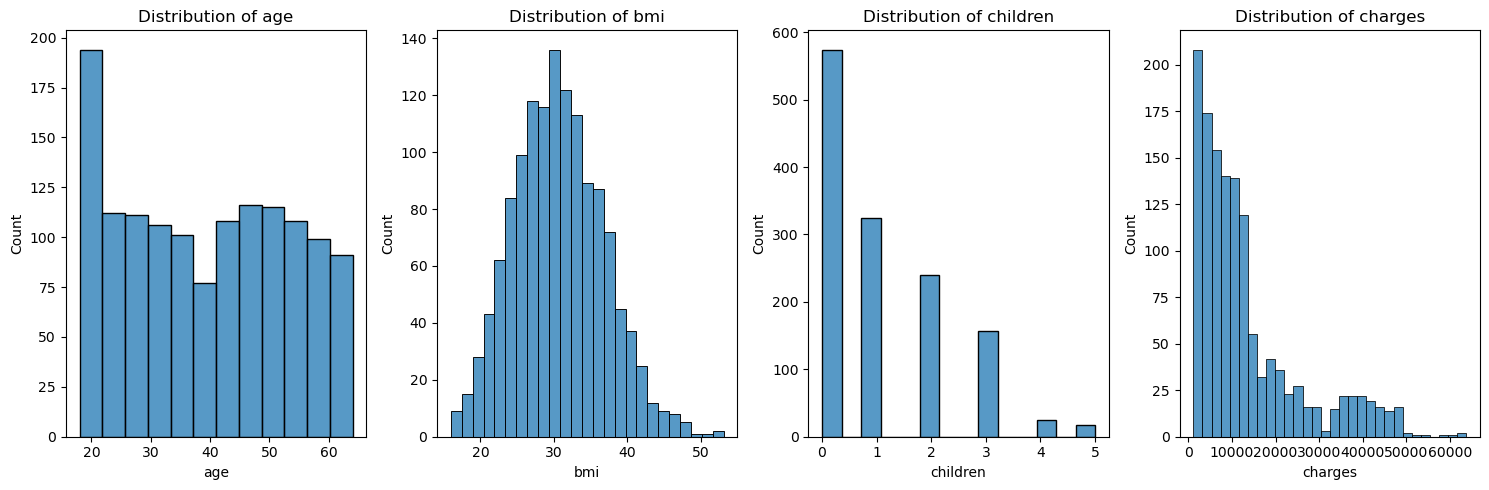

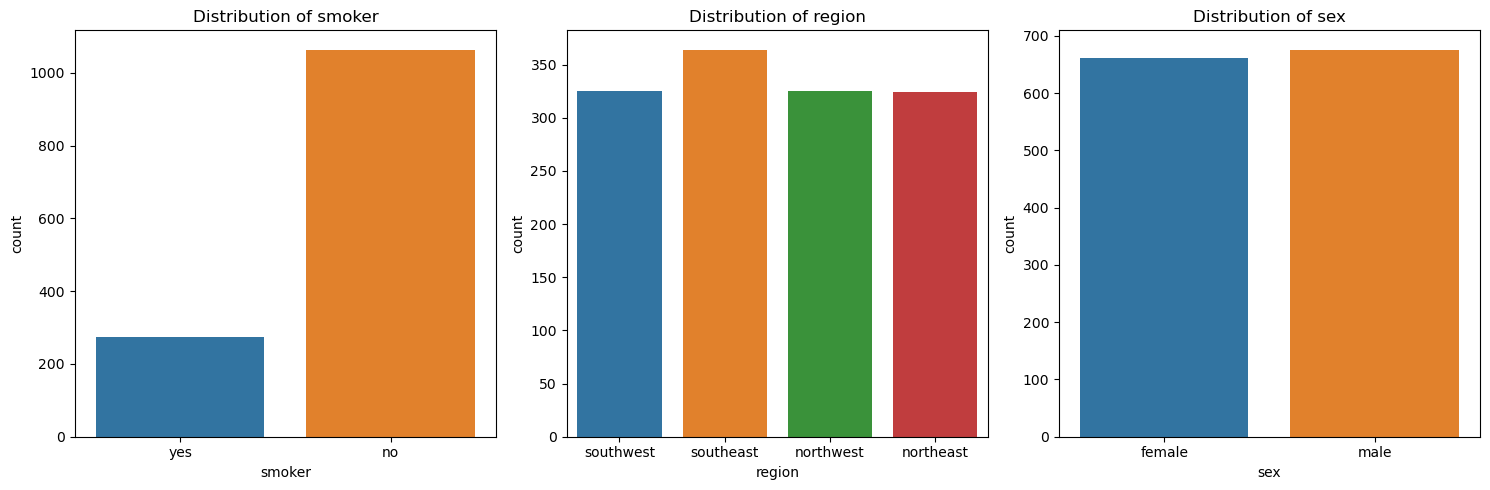

In [7]:
# Numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['smoker', 'region', 'sex']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i], hue=feature)
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [8]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# no missing values are present

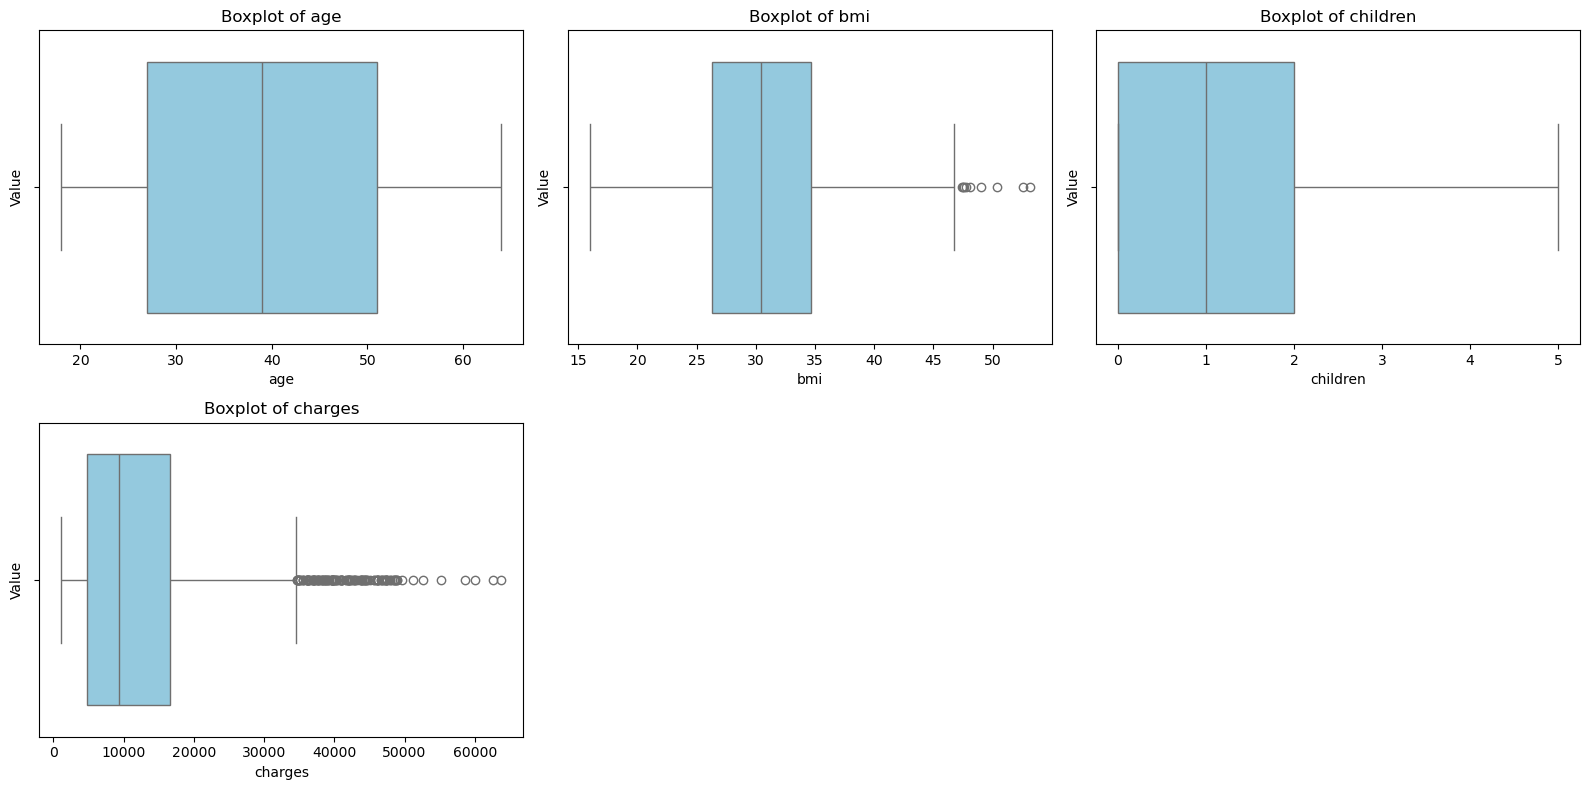

In [10]:
# plotting boxplots of all the numerical features

# Identify numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplots
ncols = 3  # Number of columns
nrows = (len(numerical_features) // ncols) + (len(numerical_features) % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))
axes = axes.flatten()  # Flatten to easily index each subplot

# Plot boxplots for numerical features
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel('Value')

# Turn off empty subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Encoding

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
# object columns
my_object_df = df.select_dtypes(include='object')

# Numeric columns
my_numeric_df = df.select_dtypes(exclude='object')

In [14]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True,dtype='int')

In [15]:
df_objects_dummies

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [16]:
# concatinating two df's
final_df = pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [33]:
final_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [35]:
final_df.to_csv('insurance_cleaned.csv',index=False)